In [1]:
import thermo
from thermo.chemical import Chemical

In [2]:
import math
import fluids
from fluids.units import *

Given:  Water at 60 degF is flowing hrough the piping system at a rate of 400 gallons per minute.
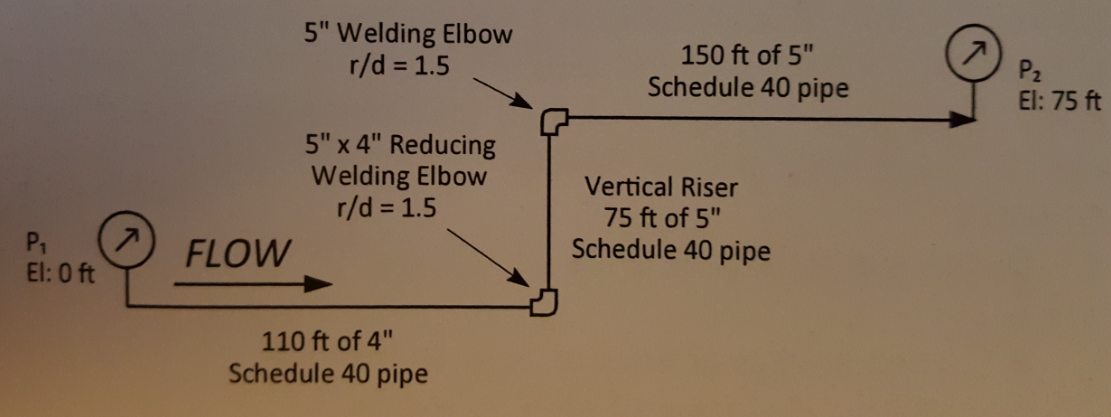
Find:  The veoocity in both the 4 and 5" pipe sizes and the pressure differential between gauges P1 and P2.

In [3]:
T = (60*u.degF).to(u.degK)

Assume atmospheric pressures

In [4]:
P = (1*u.atm).to(u.Pa)

Get the water properties from PubChem

In [5]:
water = Chemical('water', P=P.magnitude, T=T.magnitude)

# Solve using the fluids-built in functions exclusively

Only the following types of clean, new pipe have data available:
‘Plastic coated’
‘Carbon steel, honed bare’
‘Cr13, electropolished bare’
‘Cement lining’
‘Carbon steel, bare’
‘Fiberglass lining’
‘Cr13, bare’

In [6]:
mu = (water.mu*u.Pa*u.sec).to(u.cP)
rho = (water.rho*u.kilogram/u.meter**3).to(u.lb/u.feet**3)
d1 = (nearest_pipe(NPS=4*u.inch, schedule='40')[1]).to(u.inch)
d2 = (nearest_pipe(NPS=5*u.inch, schedule='40')[1]).to(u.inch)
g = 32.2*u.feet/u.second**2
Q = 400*u.gallons/u.min

ft = 0.015 #Crane 410, A-27 or 5" pipe

mu, rho, d1, d2, Q, ft

(<Quantity(1.134622271808897, 'centipoise')>,
 <Quantity(62.46920305865831, 'pound / foot ** 3')>,
 <Quantity(4.025984251968504, 'inch')>,
 <Quantity(5.047244094488188, 'inch')>,
 <Quantity(400.0, 'gallon / minute')>,
 0.015)

In [7]:
beta = d1/d2

deltaZ = 75*u.feet

A1 = math.pi*(d1/2)**2
v1 = (Q.to(u.feet**3/u.sec))/(A1.to(u.feet**2))

A2 = math.pi*(d2/2)**2
v2 = (Q.to(u.feet**3/u.sec))/(A2.to(u.feet**2))

hv = (v2**2 - v1**2)/(2*g) #kinetic energy lost

# Re

In [8]:
Re_4inch = ((50.66*Q*rho)/(d1*mu)).magnitude  #Crane 410 formula for Re is not dimensionally consistent


Re_5inch = ((50.66*Q*rho)/(d2*mu)).magnitude  #Crane 410 formula for Re is not dimensionally consistent

'{:.2e}'.format(Re_4inch),'{:.2e}'.format(Re_5inch)

('2.77e+05', '2.21e+05')

In [9]:
#4 inch piping
D1 = d1.to(u.meter)
e1 = roughness_Farshad('Carbon steel, bare', D=D1)

f1 = friction_factor(Re=Re_4inch, eD=e1/D1)

#5 inch piping
D2 = d2.to(u.meter)
e2 = roughness_Farshad('Carbon steel, bare', D=D2)

f2 = friction_factor(Re=Re_5inch, eD=e2/D2)

f1, f2  #friciton factor for the 4 and 5" pipe flow

(<Quantity(0.01738109329221049, 'dimensionless')>,
 <Quantity(0.017346530253316415, 'dimensionless')>)

# Evaluate the know Ks

In [10]:
#4" pipe
L1 = 110*u.feet
D1 = d1

K1 = f1*L1/D1.to(u.feet)

#5" pipe
L2 = 225*u.feet
D2 = d2

K2 = f2*L2/D2.to(u.feet)

K1, K2

(<Quantity(5.698741403297802, 'dimensionless')>,
 <Quantity(9.279446527086115, 'dimensionless')>)

Need to convert K1 basis to 5" pipe

In [11]:
K1_wrt5_inch = K1/beta**4 #Crane 410 equation 2-9

K1_wrt5_inch

<Quantity(14.076928256938533, 'dimensionless')>

In the absence of test data for inceasing elbows, the resistnaceis conservatively estimated to be equal to the summatoin of the resistance due to a straight size elbow and a sudden enlargement using Crane 410 A-27 forumla 4

In [12]:
#for 5x4" reducing elbow
K_red_elbow = 14*ft + ((1-beta**2)**2)/beta**4

K_red_elbow

<Quantity(0.536819457707833, 'dimensionless')>

In [13]:
#for 5" 90 deg elbows
K_elbow = 14*ft

K_elbow

0.21

In [14]:
#K total in terms of 5" pipe
Ktot = K1_wrt5_inch + K2 + K_red_elbow + K_elbow

Ktot

<Quantity(24.10319424173248, 'dimensionless')>

# hL

In [15]:
hL = (0.002593*Ktot*Q**2/(d2**4)).magnitude*u.feet

'{:.1f}'.format(hL)

'15.4 foot'

# delta P

In [16]:
deltaP = rho*(deltaZ + hv + hL)/(144*u.inch**2/u.feet**2)

'{:.2f}'.format(deltaP)

'38.81 pound / inch ** 2'